In [4]:
import matplotlib.pyplot as plt
import csv
from pathlib import Path

In [5]:
dict_profile_time = {("06", "42"): "PM004A",
                     ("07", "05"): "PM004D",
                     ("07", "37"): "PM005A",
                     ("08", "08"): "PM005D",
                     ("09", "42"): "PM006A",
                     ("10", "13"): "PM006D",
                     ("11", "01"): "PM007A",
                     ("11", "27"): "PM007D",
                     ("13", "06"): "PM008A",
                     ("13", "23"): "PM008D",
                     ("16", "54"): "PM010A",
                     ("17", "17"): "PM010D",
                     ("17", "46"): "PM011A",
                     ("18", "04"): "PM011D"}

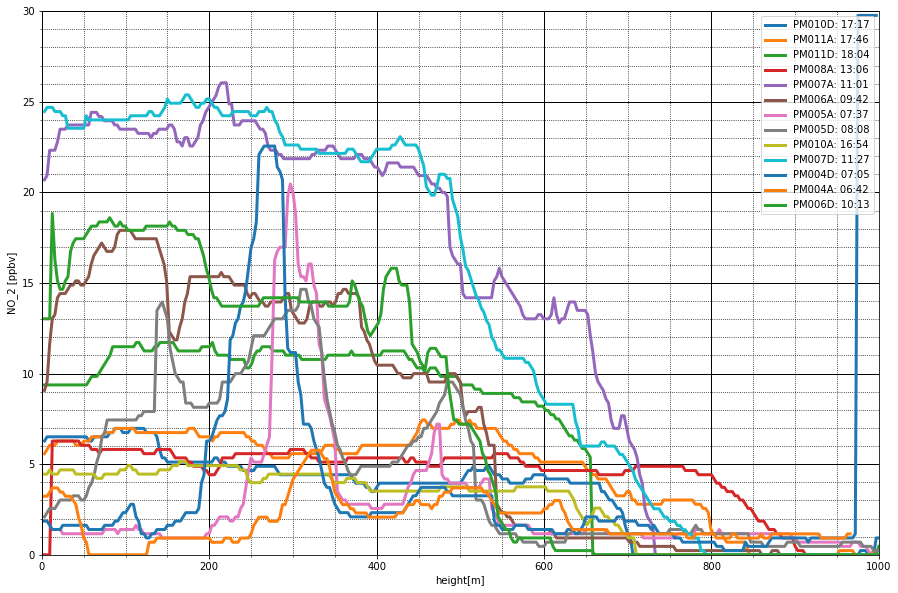

In [6]:
plt.figure(figsize=(15, 10))
for txt_path in Path(Path.cwd().parent, 
                     "data", "profiles_1", 
                     "csv").glob("*.csv"):
    with open(txt_path, "r") as csv_file:
        reader = csv.reader(csv_file)
        tup_coords: tuple[tuple[str]] = tuple(reader)
        plt.minorticks_on()
        plt.grid(which='major', color = 'k', linewidth = 1)
        plt.grid(which='minor', color = 'k', linestyle = ':')
        plt.xlim(0, 1000)
        plt.ylim(0, 30)
        plt.xlabel("height[m]")
        plt.ylabel("NO_2 [ppbv]")
        #plt.title(txt_path.name.replace(".csv", "").replace("_", " "))
        list_text = txt_path.name.replace(".csv", "").split("_")
        plt.plot(tuple(float(x[0]) for x in tup_coords), 
                 tuple(float(x[1]) for x in tup_coords),
                 linewidth=3,
                 label=f"{dict_profile_time.get(tuple(list_text[1:]))}: {list_text[1]}:{list_text[2]}")

plt.legend()
plt.show()